In [1]:
import sys
sys.path.append('D:\home\sergey\infinite_album\guitar_synth\ddsp_simplified')
sys.path.append('D:\home\sergey\infinite_album\guitar_synth\ddsp_simplified\ddsp_simplified')

In [29]:
from utilities import load_track
from matplotlib import pyplot as plt
from dataloader import _generate_loudness_contour
import numpy as np

In [11]:
audio_data = load_track(
    'D:\\home\\sergey\\infinite_album\\guitar_synth\\ddsp_simplified\\ddsp_simplified\\audio_clips\\Red_Guitar_powerchords_gated_eqed_midi_adjusted\\gated_eqed_midi_adjusted.mp3',
    sample_rate=16000,
    normalize=False,
    pitch_shift=-2
)

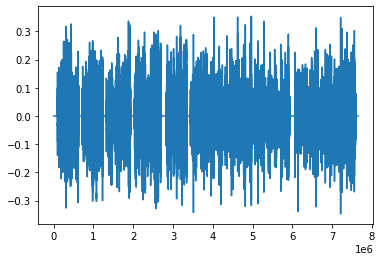

In [12]:
plt.plot(audio_data)

In [13]:
loudness_countour = _generate_loudness_contour(audio_data=audio_data, sample_rate=16000, frame_rate=250)

D:\home\sergey\infinite_album\guitar_synth\ddsp_simplified\venv37\lib\site-packages\librosa\core\convert.py:1354: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3])


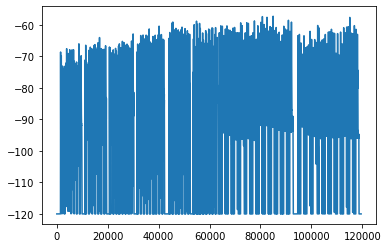

In [14]:
plt.plot(loudness_countour)

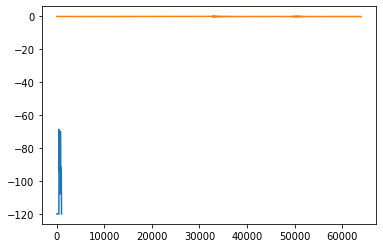

In [27]:
start_frame = 1000
num_frames_to_show = 1000
plt.plot(loudness_countour[start_frame:start_frame+num_frames_to_show])
plt.plot(audio_data[start_frame*64:(start_frame+num_frames_to_show)*64])

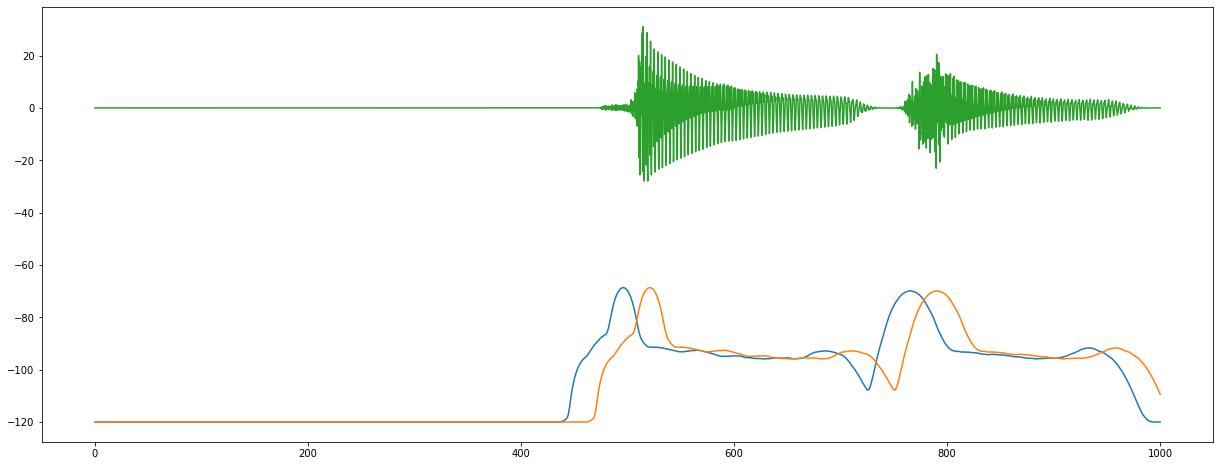

In [57]:
plt.figure(figsize=(21,8))
shift_frames = 25
plt.plot(np.linspace(0,num_frames_to_show, num_frames_to_show),loudness_countour[start_frame:start_frame+num_frames_to_show])
plt.plot(np.linspace(0,num_frames_to_show, num_frames_to_show),loudness_countour[start_frame-shift_frames:start_frame-shift_frames+num_frames_to_show])
plt.plot(np.linspace(0,num_frames_to_show, num_frames_to_show * 64),audio_data[start_frame*64:start_frame*64+num_frames_to_show*64] * 200) 

In [58]:
np.zeros(25)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
shifted_loudness = np.concatenate((np.zeros(shift_frames), loudness_countour[:-shift_frames]), axis=0)
shifted_loudness.shape, loudness_countour.shape

((119546,), (119546,))

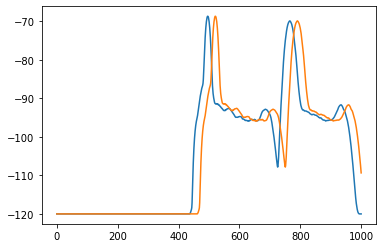

In [72]:
plt.plot(np.linspace(0,num_frames_to_show, num_frames_to_show),loudness_countour[start_frame:start_frame+num_frames_to_show])
plt.plot(np.linspace(0,num_frames_to_show, num_frames_to_show),shifted_loudness[start_frame:start_frame+num_frames_to_show])